In [ ]:
# Comparison Between QucsStudio and scikit-rf Small Signal BJT Model

A genaric NPN transistor was chosen in QucsStudio and setup for simulation in a raw common emmiter device test. Below, the S-Parameters, NFmin, and S_opt are compared to the scikit-rf NPN model

![QucsStudio Circuit](images/qucs_compare_npn_1.png)

Mje and Mjc were set to 0 in the QucsStudio so that the values Cje and Cjc correspond to cpi and cu respectively.

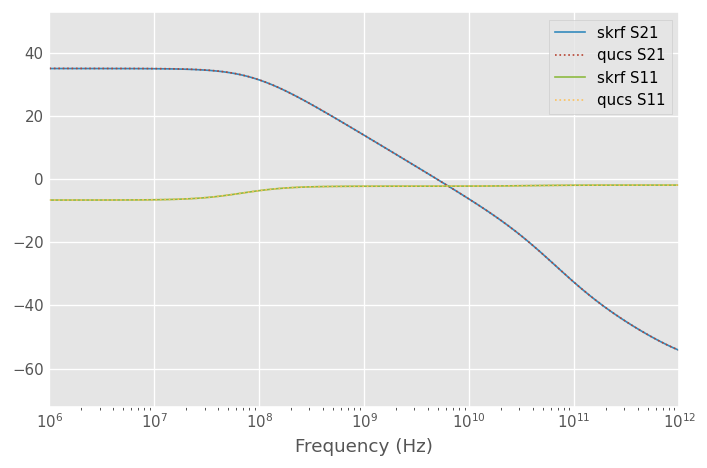

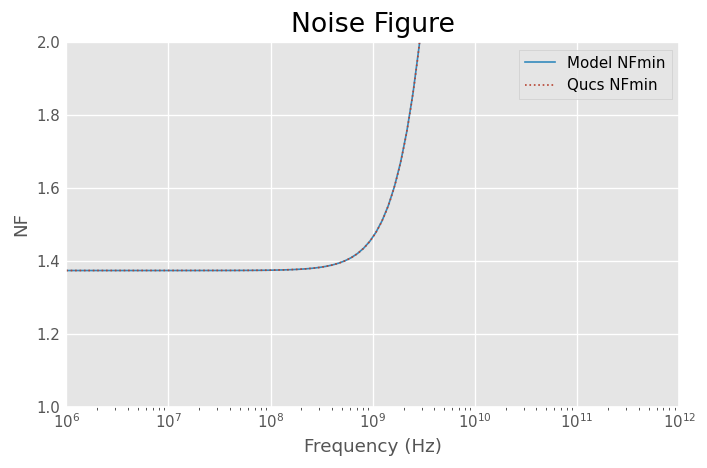

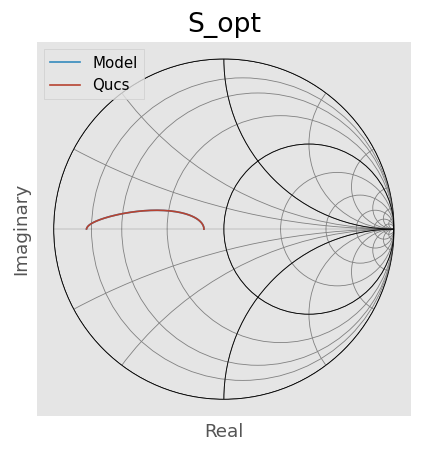

In [1]:
import skrf as rf
import numpy as npy
from skrf.constants import *
from skrf import mathFunctions as mf
%matplotlib inline
from pylab import * 
rf.stylely()
from skrf.plotting import func_on_all_figs as foaf

# Parameters shared between QucsStudio and the model here
Ic_ma = 21.4 # bias current in milliamps
beta0 = 107 # current gain,
cpi = 4e-12
cu = 1e-12
rbb = 5.303
ru = 100e9
rc = 0.3741
re = 0.03041
r0 = 1e4
cjx = 1e-18
cjs = 1e-18
T = 300 # The SPICE parameters seem to be acquired at this temperature

# Load the QucsStudio simulated data
tmp = npy.genfromtxt('qucs_simulations/RawBJTNoiseTest.csv',delimiter=",", dtype='str')
mp = npy.vectorize(lambda t:complex(t.replace('i', 'j')))
rdat = mp(tmp)
qucs_f = rdat[:,0]
qucs_S11 =  mf.complex_2_db(rdat[:,1])
qucs_S12 =  mf.complex_2_db(rdat[:,2])
qucs_S21 =  mf.complex_2_db(rdat[:,3])
qucs_S22 =  mf.complex_2_db(rdat[:,4])
qucs_NFmin = npy.abs(rdat[:,5])
qucs_g_opt = rdat[:,6]

# Simulate NPN model in scikit-rf
frequency = rf.Frequency(start=1000000, stop=1000000000000, npoints=100, unit='Hz', sweep_type='log')
ntwkT = rf.components.SmallSig_NPN_BJT_CE_2port(Ic_ma, beta0, cpi, cu, rbb, rc, re, ru, r0, cjx, cjs, 
                                                frequency = frequency, T0 = T)

model_nfmin_db = ntwkT.nfmin_db
z0 = 50
model_nf_db = ntwkT.nf_db(z0)
sparams = ntwkT.s_db
npy.max(sparams)                                

figure(0)
semilogx(frequency.f_scaled, sparams[:,1,0], label=r'skrf S21')
semilogx(qucs_f, qucs_S21,":" , label=r'qucs S21')
semilogx(frequency.f_scaled, sparams[:,0,0], label=r'skrf S11')
semilogx(qucs_f, qucs_S11, ":",label=r'qucs S11')
foaf(frequency.labelXAxis)
foaf(tight_layout)
foaf(legend)
tight_layout()

figure(1)
ylabel('NF')
title('Noise Figure')
semilogx(frequency.f_scaled, model_nfmin_db, label=r'Model NFmin')
semilogx(qucs_f, qucs_NFmin,":" ,label=r'Qucs NFmin')

ylim(1,2)
foaf(frequency.labelXAxis)
foaf(tight_layout)
foaf(legend)

tight_layout()

figure(2)
rf.plotting.plot_smith(ntwkT.g_opt, title="S_opt", label=r'Model')
rf.plotting.plot_smith(qucs_g_opt,  title="S_opt", label=r'Qucs')
foaf(legend)